# Pymaceuticals Inc.
---

### Analysis

- Capomulin appears to be the most 'succesful' drug regimen based on number of timepoints.
- Capomulin also produced the smallest tumour size out of all drug regimens. 
- There is a strong correlation between weight and average tumour size. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
 
mouse_data_complete = pd.merge(mouse_metadata , study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Combine the data into a single dataset.  
mouse_data_complete = pd.merge(study_results , mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.


In [5]:
# Checking the number of mice.
mouse_count = mouse_data_complete["Mouse ID"].nunique()
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

no_duplicate_mouse_data = mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint'])


mouse_data_complete [no_duplicate_mouse_data] ["Mouse ID"].unique()

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
mouse_data_complete [mouse_data_complete["Mouse ID"]=="g989"].head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_data = mouse_data_complete.loc [mouse_data_complete["Mouse ID"]!="g989"]
mouse_clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_clean_data["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_clean_data_functions = mouse_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

mouse_clean_data_functions_renamed = mouse_clean_data_functions.rename(
    columns={
        "mean": "Mean Tumor Volume",
        "median": "Median Tumor Volume",
        "var": "Tumor Volume Variance",
        "std": "Tumor Volume Std. Dev.",
        "sem": "Tumor Volume Std. Err."})
# Assemble the resulting series into a single summary DataFrame.

mouse_clean_data_functions_renamed

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_clean_data_functions = mouse_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

mouse_clean_data_functions

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

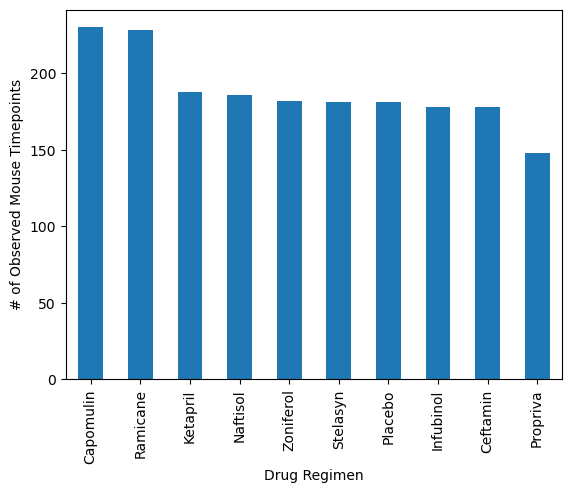

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


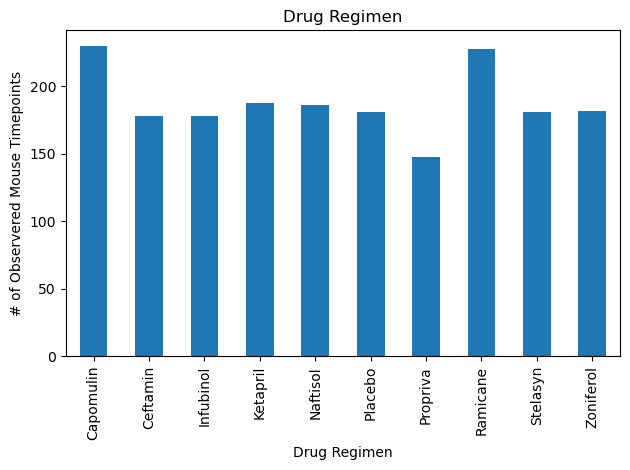

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
 
bar_plot = mouse_clean_data.groupby('Drug Regimen').size()

bar_plot.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observered Mouse Timepoints')
plt.title('Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout()
#value count  
#x value 
#value count 
plt.show()

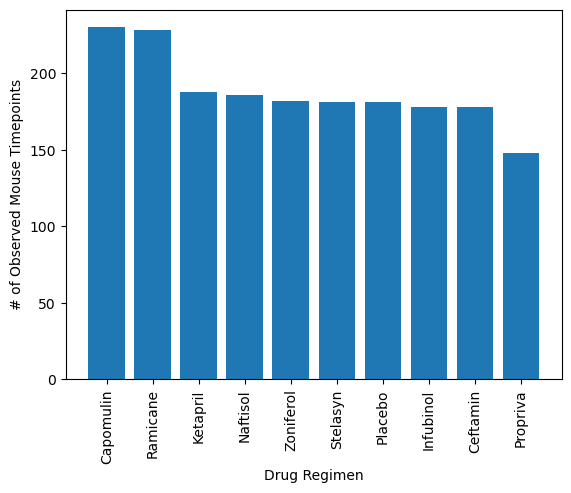

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


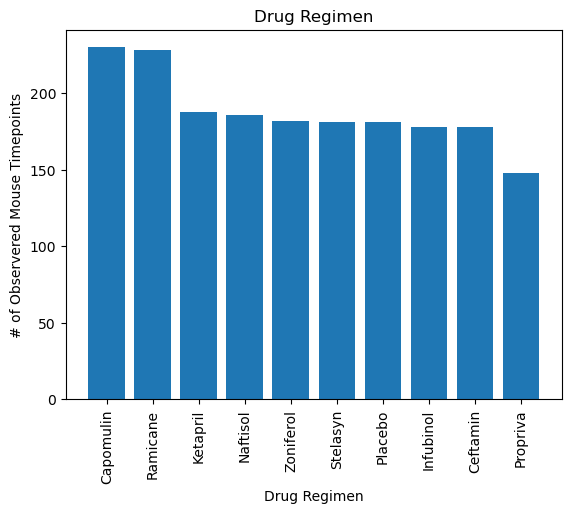

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

py_bar_plot = mouse_clean_data['Drug Regimen'].value_counts()

plt.bar(py_bar_plot.index.values,py_bar_plot.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observered Mouse Timepoints')
plt.title('Drug Regimen')
plt.xticks(rotation=90)
plt.show()

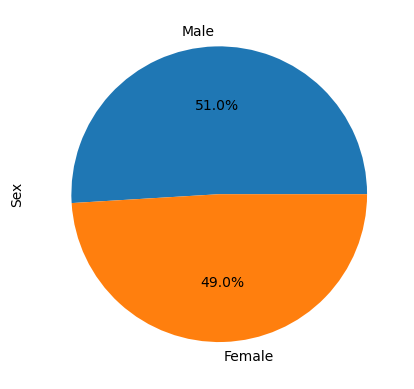

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#counts.plot



<function matplotlib.pyplot.show(close=None, block=None)>

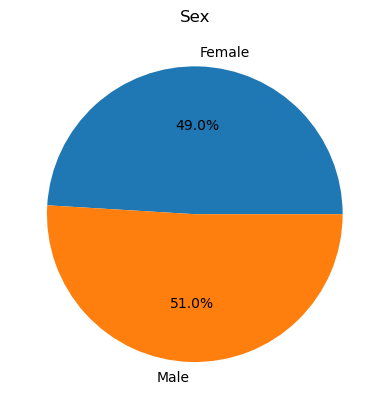

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#counts.plot
pie_chart = mouse_clean_data.groupby('Sex').size()

pie_chart.plot(kind='pie',y = 'Male', autopct="%.1f%%")
plt.title('Sex')
plt.show


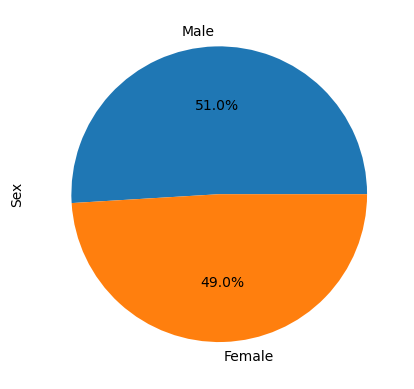

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#counts.values


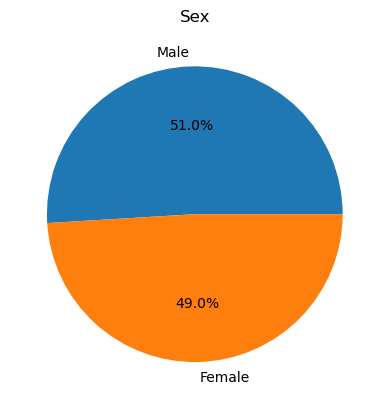

In [18]:
py_pie_plot = mouse_clean_data['Sex'].value_counts()
sexes = ["Male", "Female"]
plt.pie(py_pie_plot, labels=sexes, autopct="%1.1f%%")

plt.title('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# use grouby on 'Mouse ID' with .max restrict to 'Timepoint'

#reset_index. Move 'Mouse ID' to column on DataFrame

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Merge on ['Mouse ID', 'Timepoint'] 


In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# use grouby on 'Mouse ID' with .max restrict to 'Timepoint'


                                          
grouped_last_timepoint = mouse_clean_data.groupby("Mouse ID").max()[["Timepoint"]]

grouped_last_timepoint = grouped_last_timepoint.reset_index()

grouped_last_timepoint

#reset_index. Move 'Mouse ID' to column on DataFrame

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_mouse_clean_data = pd.merge(grouped_last_timepoint , mouse_clean_data,on =['Mouse ID', 'Timepoint'])

merged_mouse_clean_data
# Merge on ['Mouse ID', 'Timepoint'] 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [54]:

# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:

   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    
    # (dataframe you just calculated) Get a DataFrame using .loc where 'Drug Regimen' == treatment, restrict to 'Tumor Volume (mm3)'
    new_df = merged_mouse_clean_data.loc[merged_mouse_clean_data['Drug Regimen']== treatment][['Tumor Volume (mm3)']]
    

    
    # add subset 
    tumor_vol_data.append(new_df)
    
    

    
    # Determine outliers using upper and lower bounds
    
    
    quartiles = new_df.quantile([.25, .5, .75])
    lowerq = quartiles.iloc[[0.25]]  
    upperq = quartiles.iloc[[0.75]]  
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

Values below       Tumor Volume (mm3)
0.25           32.377357 could be outliers.
Values above       Tumor Volume (mm3)
0.25           32.377357 could be outliers.
Values below       Tumor Volume (mm3)
0.25            31.56047 could be outliers.
Values above       Tumor Volume (mm3)
0.25            31.56047 could be outliers.
Values below       Tumor Volume (mm3)
0.25           54.048608 could be outliers.
Values above       Tumor Volume (mm3)
0.25           54.048608 could be outliers.
Values below       Tumor Volume (mm3)
0.25           48.722078 could be outliers.
Values above       Tumor Volume (mm3)
0.25           48.722078 could be outliers.


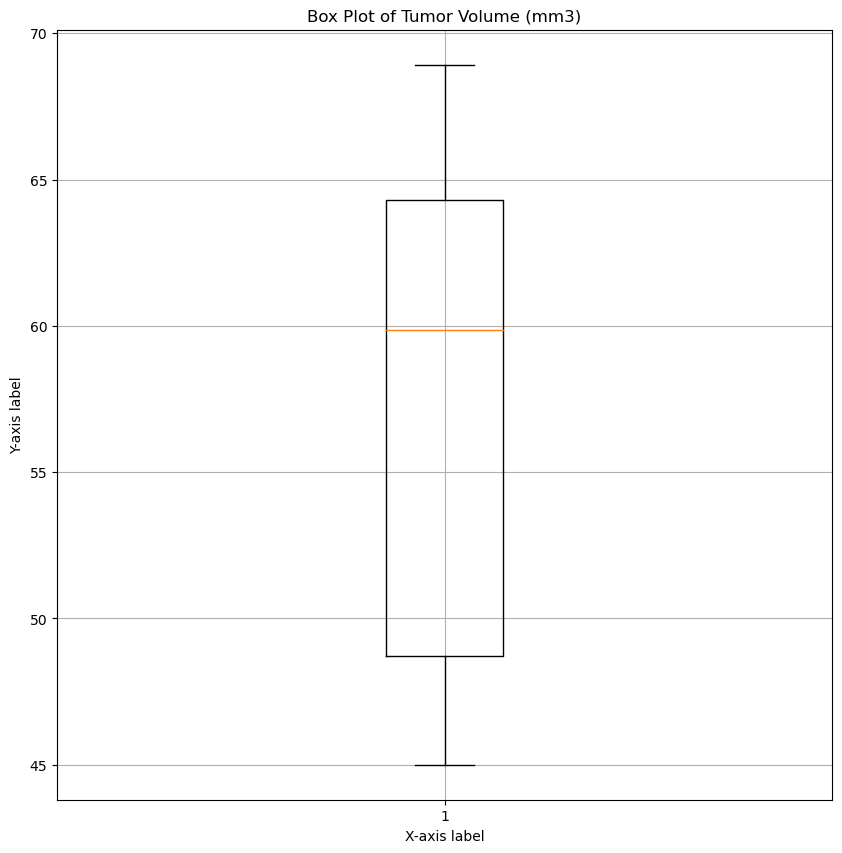

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Assuming your DataFrame is named df and you want to create a box plot for a specific column 'column_name'
plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
plt.boxplot(new_df["Tumor Volume (mm3)"])
plt.xlabel('X-axis label')  # Replace 'X-axis label' with the appropriate label for your data
plt.ylabel('Y-axis label')  # Replace 'Y-axis label' with the appropriate label for your data
plt.title('Box Plot of Tumor Volume (mm3)')  # Replace 'column_name' with the actual column name you're plotting
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()


## Line and Scatter Plots

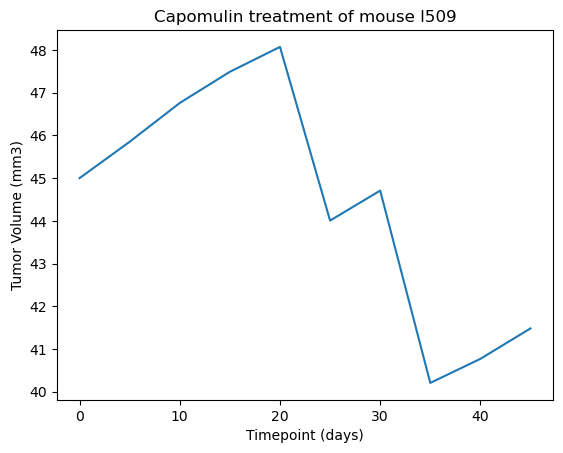

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


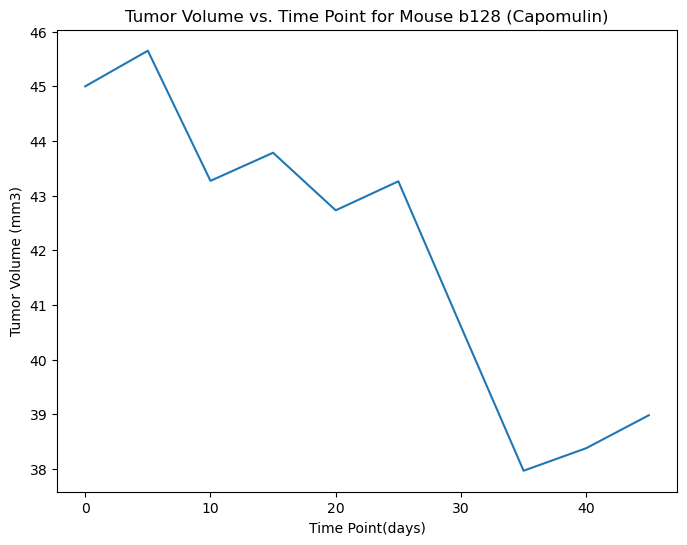

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


mouse_id = 'b128'  
capomulin_data = mouse_clean_data[(mouse_clean_data['Mouse ID'] == mouse_id) & (mouse_clean_data['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(8, 6))  
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point(days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


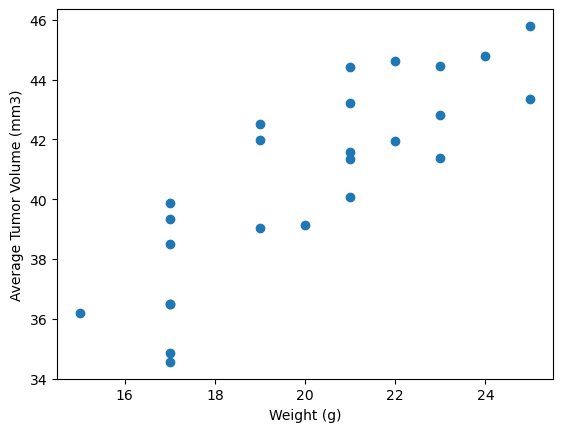

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


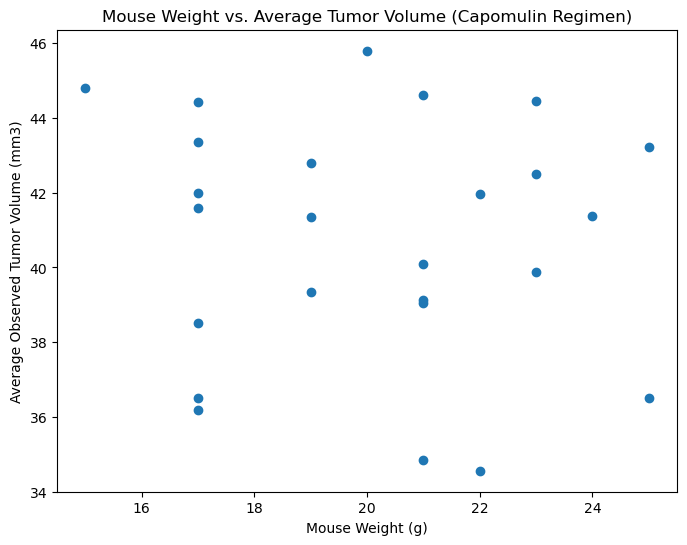

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_clean_data[mouse_clean_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.drop_duplicates(subset='Mouse ID')['Weight (g)']

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


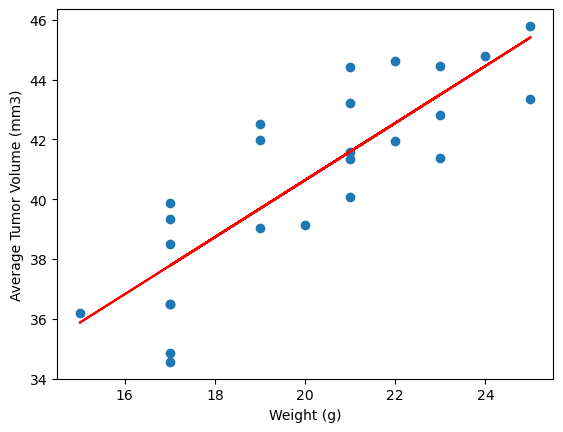

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
